# Modell för smittspridning av mässlingen med olika vaccinationsgrader

Syfte:
    Kör en agentbaserad SIR-modell för mässling vid olika vaccinationsgrader och visar hur populationen utvecklas över tid.

Input:  
Inga externa inputs via parametrar. Modellparametrar anges direkt i filen:  
N: antal agenter  
width, height: area  
initial_infected: antal infekterade vid start  
vaccination_rate: vaccinationsgrad  
mortality_rate: dödlighet  
timesteps: antal tidssteg   

Output:  
Grafer över S, I, R och D  
Plottar Re (effektivt reproduktionstal)  
Utskrift av resultat för varje simulering

In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Modellparametrar
N = 1000
width = 14
height = 7
initial_infected = 1
mortality_rate = 0.0021
timesteps = 100

## Vaccination rate: 50% (Lägre än IDAHO)

Här skapas en SIR-modell.  
Simulering av smittspridning körs med en  vaccinationsgrad på 50%. Skriver ut antalet suceptible (S), infected (I), recovered (R) och dead (D) efter 1000 dagar.

In [3]:
vaccination_rate = 0.5

num_runs = 10 # antal körningar 

S_runs = [] 
I_runs = [] 
R_runs = [] 
D_runs = [] 
Re_runs = [] 
new_inf_runs = []
total_new_inf_runs = []

for run in range(num_runs):
 
    model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

    for t in range(timesteps):
        model.step()

    model_df = model.datacollector.get_model_vars_dataframe()
    
    new_inf_runs.append(model_df["New Infected"].values)
    total_new_inf_runs.append(model_df["Total New Infected"].values)
    Re_runs.append(model_df["Re"].values) 

    S_runs.append(model_df["Susceptible"].values)
    I_runs.append(model_df["Infected"].values)
    R_runs.append(model_df["Resistant"].values)
    D_runs.append(model_df["Dead"].values)

S_arr = np.array(S_runs)
I_arr = np.array(I_runs)
R_arr = np.array(R_runs)
D_arr = np.array(D_runs)
Re_arr = np.array(Re_runs) 
new_inf_runs_arr = np.array(new_inf_runs)
total_new_inf_runs_arr = np.array(total_new_inf_runs)

S_mean, S_std = np.mean(S_arr, axis=0), np.std(S_arr, axis=0)
I_mean, I_std = np.mean(I_arr, axis=0), np.std(I_arr, axis=0)
R_mean, R_std = np.mean(R_arr, axis=0), np.std(R_arr, axis=0)
D_mean, D_std = np.mean(D_arr, axis=0), np.std(D_arr, axis=0)
Re_mean, Re_std = np.mean(Re_arr, axis=0), np.std(Re_arr, axis=0)

mean_new = new_inf_runs_arr.mean(axis=0)
std_new = new_inf_runs_arr.std(axis=0)
mean_total = total_new_inf_runs_arr.mean(axis=0)
std_total = total_new_inf_runs_arr.std(axis=0)

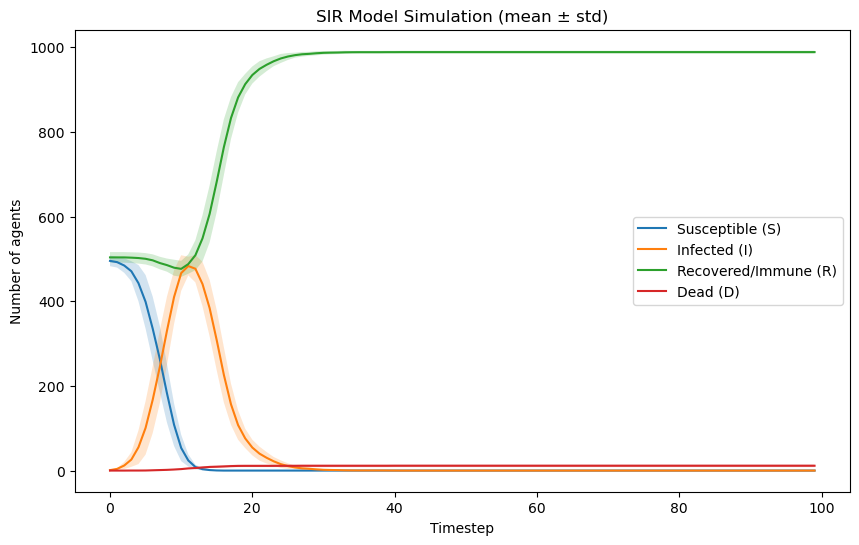

In [4]:
timesteps_range = np.arange(timesteps)

plt.figure(figsize=(10,6))
plt.plot(S_mean, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, alpha=0.2)

plt.plot(I_mean, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.plot(R_mean, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, alpha=0.2)

plt.plot(D_mean, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


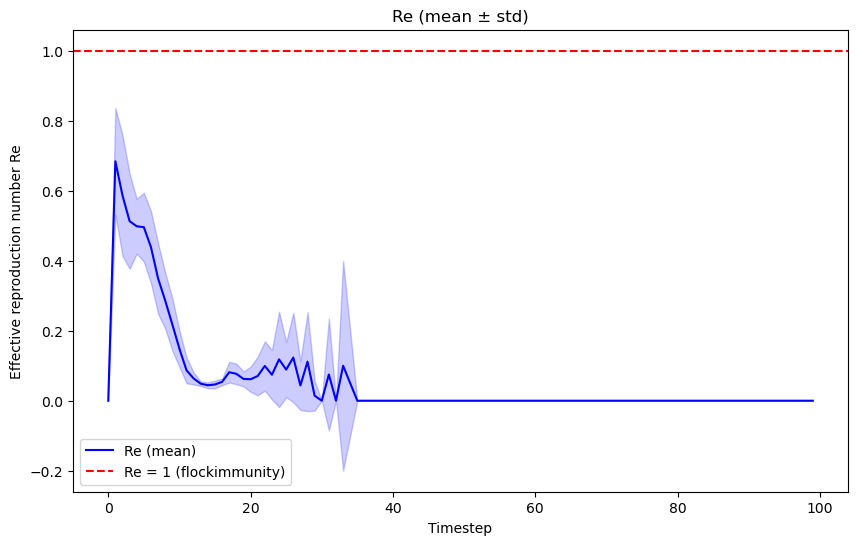

In [5]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean - Re_std, Re_mean + Re_std, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()


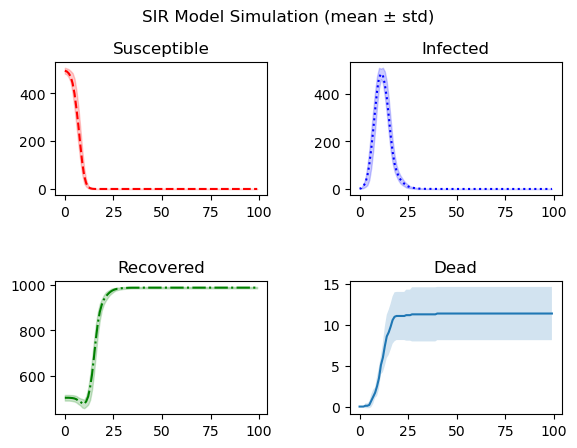

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()



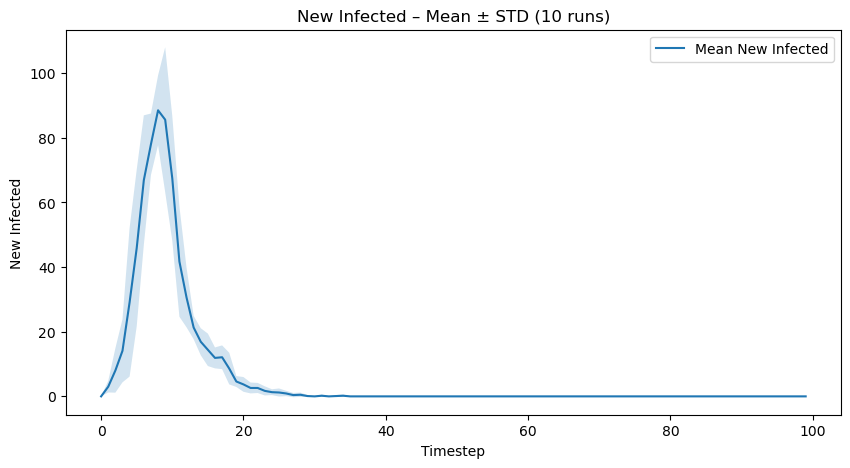

In [7]:
plt.figure(figsize=(10,5))
plt.plot(mean_new, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new - std_new, mean_new + std_new, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

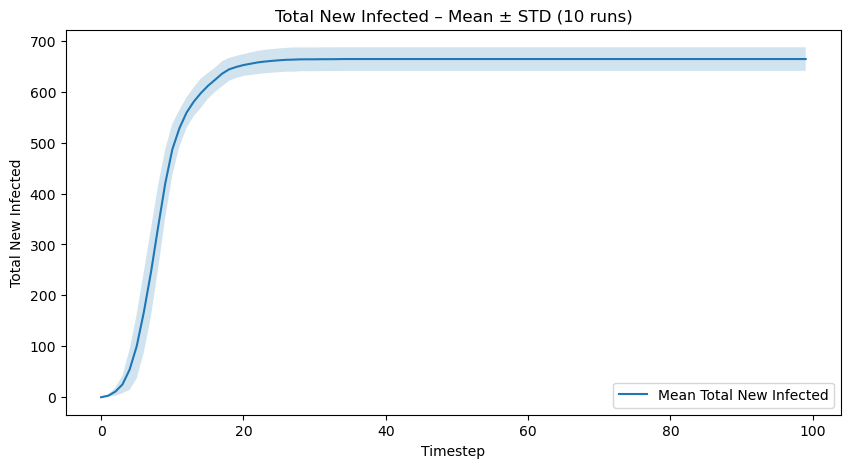

In [8]:
plt.figure(figsize=(10,5))
plt.plot(mean_total, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total - std_total, mean_total + std_total, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

In [9]:
agent_df = model.datacollector.get_agent_vars_dataframe()

In [10]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
print(model_df["Re"].mean())

0.06632493177353276


## Vaccination rate: 78.5% (IDAHO)

In [11]:
#Ny simulering med 78.5% vaccinationsgrad

vaccination_rate_2 = 0.785 

S_runs_2 = [] 
I_runs_2 = [] 
R_runs_2 = [] 
D_runs_2 = [] 
Re_runs_2 = [] 
new_inf_runs_2 = []
total_new_inf_runs_2 = []

for run in range(num_runs):
 
    model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

    for t in range(timesteps):
        model_2.step()

    model_df_2 = model_2.datacollector.get_model_vars_dataframe()
    
    new_inf_runs_2.append(model_df_2["New Infected"].values)
    total_new_inf_runs_2.append(model_df_2["Total New Infected"].values)
    Re_runs_2.append(model_df_2["Re"].values) 

    S_runs_2.append(model_df_2["Susceptible"].values)
    I_runs_2.append(model_df_2["Infected"].values)
    R_runs_2.append(model_df_2["Resistant"].values)
    D_runs_2.append(model_df_2["Dead"].values)

S_arr_2 = np.array(S_runs_2)
I_arr_2 = np.array(I_runs_2)
R_arr_2 = np.array(R_runs_2)
D_arr_2 = np.array(D_runs_2)
Re_arr_2 = np.array(Re_runs_2) 
new_inf_runs_arr_2 = np.array(new_inf_runs_2)
total_new_inf_runs_arr_2 = np.array(total_new_inf_runs_2)

S_mean_2, S_std_2 = np.mean(S_arr_2, axis=0), np.std(S_arr_2, axis=0)
I_mean_2, I_std_2 = np.mean(I_arr_2, axis=0), np.std(I_arr_2, axis=0)
R_mean_2, R_std_2 = np.mean(R_arr_2, axis=0), np.std(R_arr_2, axis=0)
D_mean_2, D_std_2 = np.mean(D_arr_2, axis=0), np.std(D_arr_2, axis=0)
Re_mean_2, Re_std_2 = np.mean(Re_arr_2, axis=0), np.std(Re_arr_2, axis=0)

mean_new_2 = new_inf_runs_arr_2.mean(axis=0)
std_new_2 = new_inf_runs_arr_2.std(axis=0)
mean_total_2 = total_new_inf_runs_arr_2.mean(axis=0)
std_total_2 = total_new_inf_runs_arr_2.std(axis=0)


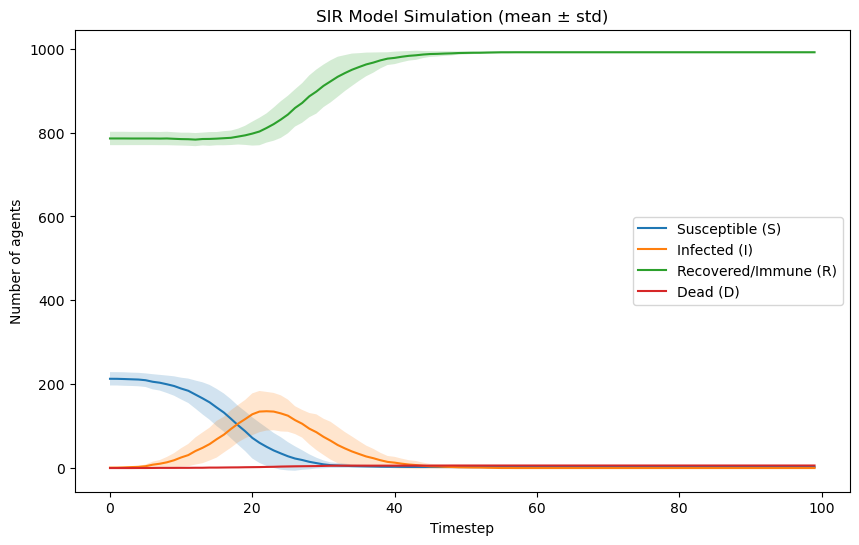

In [12]:
plt.figure(figsize=(10,6))
plt.plot(S_mean_2, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean_2 - S_std_2, S_mean_2 + S_std_2, alpha=0.2)

plt.plot(I_mean_2, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean_2 - I_std_2, I_mean_2 + I_std_2, alpha=0.2)

plt.plot(R_mean_2, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean_2 - R_std_2, R_mean_2 + R_std_2, alpha=0.2)

plt.plot(D_mean_2, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean_2 - D_std_2, D_mean_2 + D_std_2, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


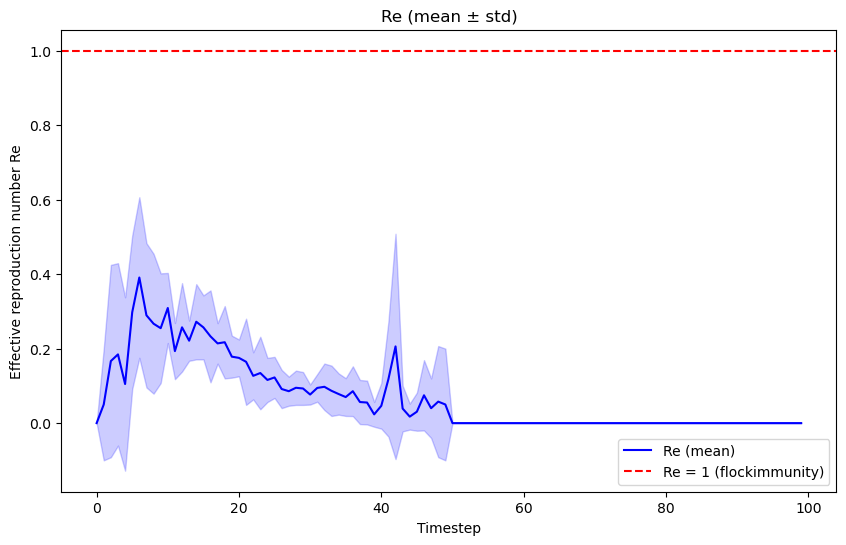

In [13]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean_2, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean_2 - Re_std_2, Re_mean_2 + Re_std_2, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()

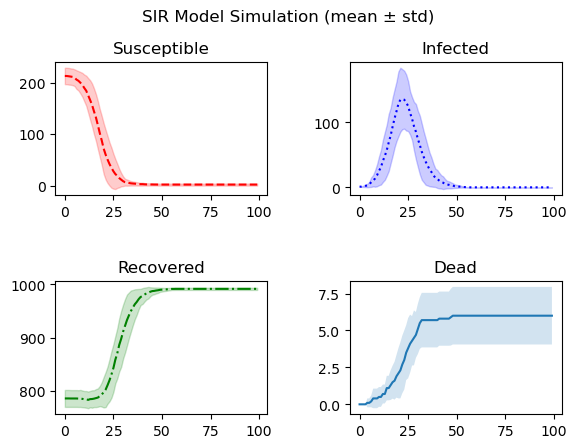

In [14]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean_2,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean_2 - S_std_2, S_mean_2 + S_std_2, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean_2,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean_2 - I_std_2, I_mean_2 + I_std_2, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean_2,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean_2 - R_std_2, R_mean_2 + R_std_2, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean_2, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean_2 - D_std_2, D_mean_2 + D_std_2, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()


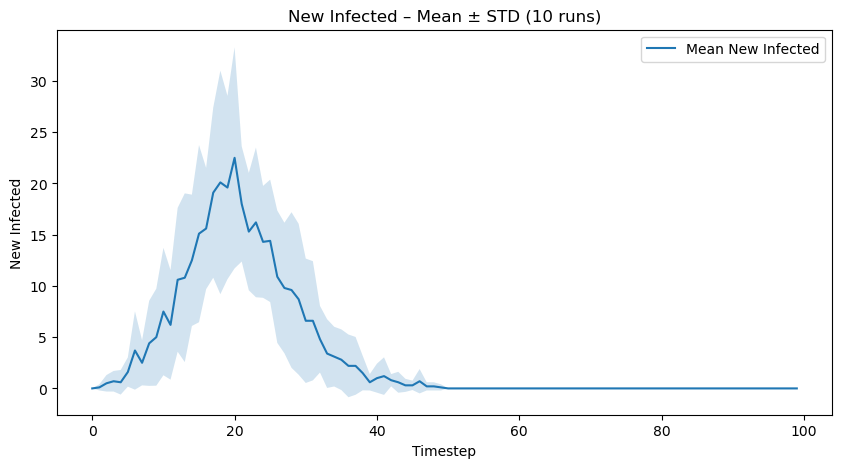

In [15]:
plt.figure(figsize=(10,5))
plt.plot(mean_new_2, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new_2 - std_new_2, mean_new_2 + std_new_2, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

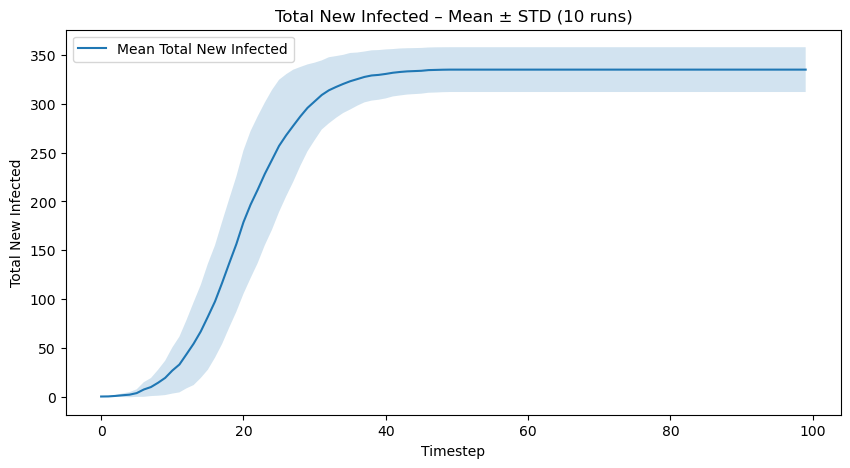

In [16]:
plt.figure(figsize=(10,5))
plt.plot(mean_total_2, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total_2 - std_total_2, mean_total_2 + std_total_2, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

## Vaccination rate: 95% (önskad vaccinationstäckning)

In [17]:
#Ny simulering med 95% vaccinationsgrad

vaccination_rate_3 = 0.95

S_runs_3 = [] 
I_runs_3 = [] 
R_runs_3 = [] 
D_runs_3 = [] 
Re_runs_3 = [] 
new_inf_runs_3 = []
total_new_inf_runs_3 = []

for run in range(num_runs):
 
    model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

    for t in range(timesteps):
        model_3.step()

    model_df_3 = model_3.datacollector.get_model_vars_dataframe()
    
    new_inf_runs_3.append(model_df_3["New Infected"].values)
    total_new_inf_runs_3.append(model_df_3["Total New Infected"].values)
    Re_runs_3.append(model_df_3["Re"].values) 

    S_runs_3.append(model_df_3["Susceptible"].values)
    I_runs_3.append(model_df_3["Infected"].values)
    R_runs_3.append(model_df_3["Resistant"].values)
    D_runs_3.append(model_df_3["Dead"].values)

S_arr_3 = np.array(S_runs_3)
I_arr_3 = np.array(I_runs_3)
R_arr_3 = np.array(R_runs_3)
D_arr_3 = np.array(D_runs_3)
Re_arr_3 = np.array(Re_runs_3) 
new_inf_runs_arr_3 = np.array(new_inf_runs_3)
total_new_inf_runs_arr_3 = np.array(total_new_inf_runs_3)

S_mean_3, S_std_3 = np.mean(S_arr_3, axis=0), np.std(S_arr_3, axis=0)
I_mean_3, I_std_3 = np.mean(I_arr_3, axis=0), np.std(I_arr_3, axis=0)
R_mean_3, R_std_3 = np.mean(R_arr_3, axis=0), np.std(R_arr_3, axis=0)
D_mean_3, D_std_3 = np.mean(D_arr_3, axis=0), np.std(D_arr_3, axis=0)
Re_mean_3, Re_std_3 = np.mean(Re_arr_3, axis=0), np.std(Re_arr_3, axis=0)

mean_new_3 = new_inf_runs_arr_3.mean(axis=0)
std_new_3 = new_inf_runs_arr_3.std(axis=0)
mean_total_3 = total_new_inf_runs_arr_3.mean(axis=0)
std_total_3 = total_new_inf_runs_arr_3.std(axis=0)

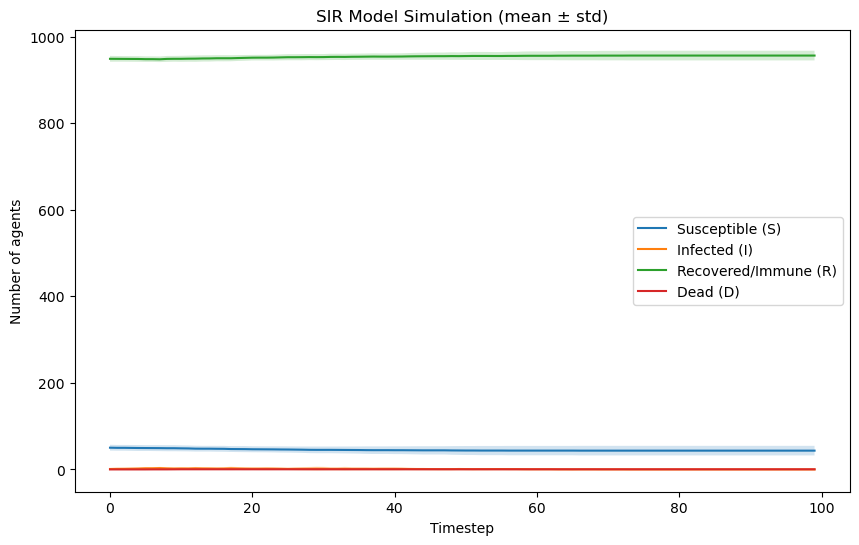

In [18]:
plt.figure(figsize=(10,6))
plt.plot(S_mean_3, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean_3 - S_std_3, S_mean_3 + S_std_3, alpha=0.2)

plt.plot(I_mean_3, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean_3 - I_std_3, I_mean_3 + I_std_3, alpha=0.2)

plt.plot(R_mean_3, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean_3 - R_std_3, R_mean_3 + R_std_3, alpha=0.2)

plt.plot(D_mean_3, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean_3 - D_std_3, D_mean_3 + D_std_3, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


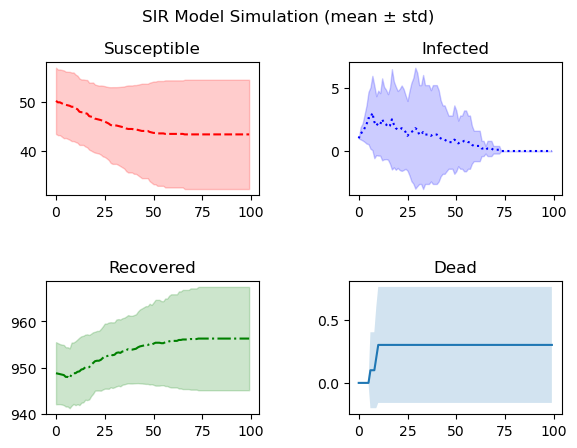

In [19]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean_3,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean_3 - S_std_3, S_mean_3 + S_std_3, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean_3,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean_3 - I_std_3, I_mean_3 + I_std_3, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean_3,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean_3 - R_std_3, R_mean_3 + R_std_3, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean_3, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean_3 - D_std_3, D_mean_3 + D_std_3, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()


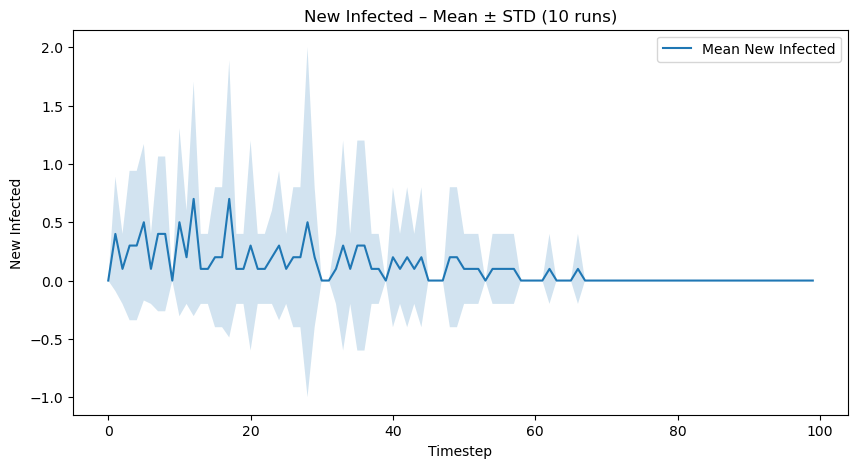

In [20]:
plt.figure(figsize=(10,5))
plt.plot(mean_new_3, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new_3 - std_new_3, mean_new_3 + std_new_3, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

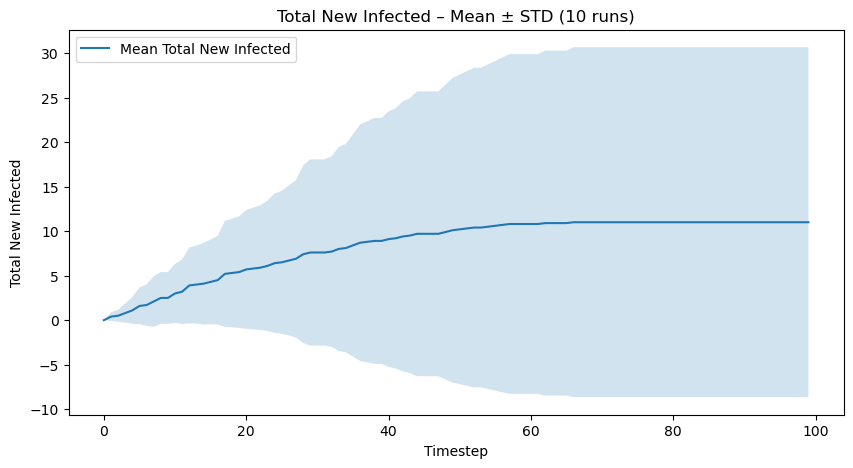

In [21]:
plt.figure(figsize=(10,5))
plt.plot(mean_total_3, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total_3 - std_total_3, mean_total_3 + std_total_3, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()